# Лабораторная работа 4

## Правильный многоугольник Рело.Векторизация вычислений в numpy

*Ляпунова Арина Сергеевна , 03.04.2025*

# Задание 4.1. Построение треугольника Рело

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело

## Этап 1. Вычисление координат вершин правильного треугольника

In [4]:
l = r # !!! равенство справедливо только для треугольника Рело

In [5]:
R = l/(2*np.sin(np.pi/n))

In [6]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

In [7]:
vertices[0,0], vertices[0,:], vertices[:,1]

(np.float64(5.773502691896258),
 array([5.77350269, 0.        ]),
 array([ 0.,  5., -5.]))

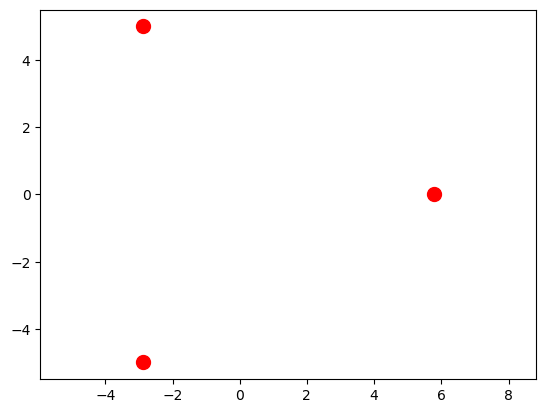

In [8]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

## Этап 2. Представление одной стороны треугольника Рело

In [9]:
alpha = 2*np.pi/n
beta = alpha/2

In [10]:
angle = np.linspace(-beta/2, beta/2, N)

In [11]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi),
 np.sin(angle + np.pi)])

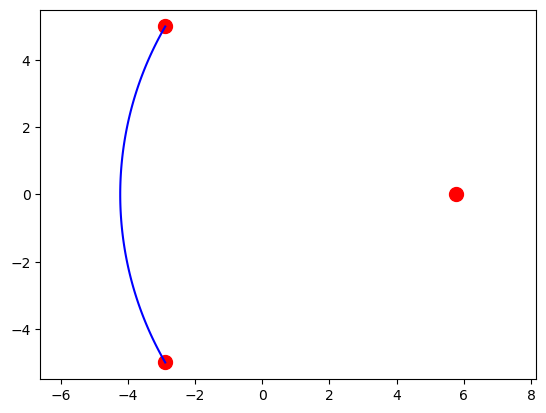

In [12]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

In [13]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),
 np.sin(angle + np.pi + alpha)])

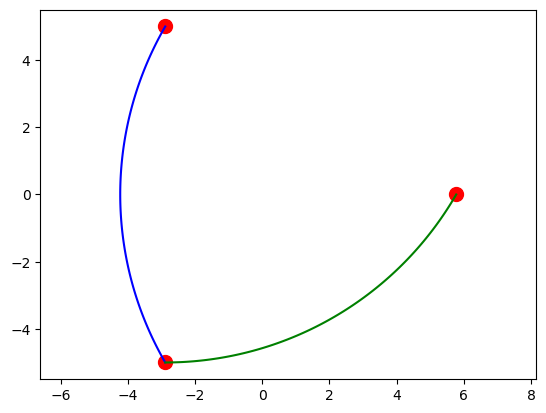

In [14]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

## Этап 3. Моделирование границы треугольника Рело

In [15]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]

In [16]:
sides = np.concatenate(list_sides)

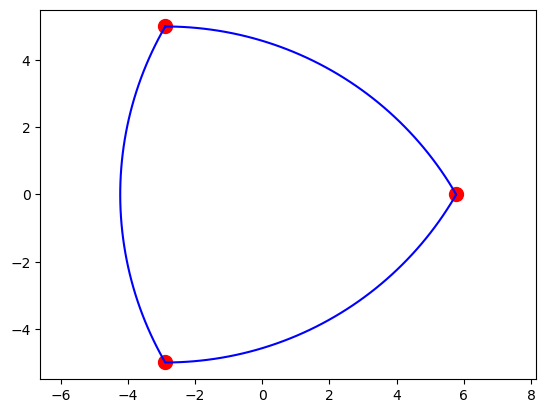

In [17]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

# Задание 4.2. Построение правильного многоугольника Рело

In [18]:
n=5
center= np.array([0,0])
r=10
N=100

$$R = \frac{l}{2\sin\left(\frac{\pi}{n}\right)}$$

$$l = 2r \sin\left(\frac{\pi}{2n}\right)$$

In [19]:
l = 2 * r * np.sin(np.pi / (2 * n))

In [20]:
R= l/(2*np.sin(np.pi/n))

In [21]:
t=np.arange(0,2*np.pi, 2*np.pi/n)
vertices= center+ R*np.transpose([np.cos(t),np.sin(t)])
vertices

array([[ 5.25731112,  0.        ],
       [ 1.62459848,  5.        ],
       [-4.25325404,  3.09016994],
       [-4.25325404, -3.09016994],
       [ 1.62459848, -5.        ]])

In [22]:
vertices[0,0], vertices[0,:], vertices[0], vertices[:,1]

(np.float64(5.257311121191336),
 array([5.25731112, 0.        ]),
 array([5.25731112, 0.        ]),
 array([ 0.        ,  5.        ,  3.09016994, -3.09016994, -5.        ]))

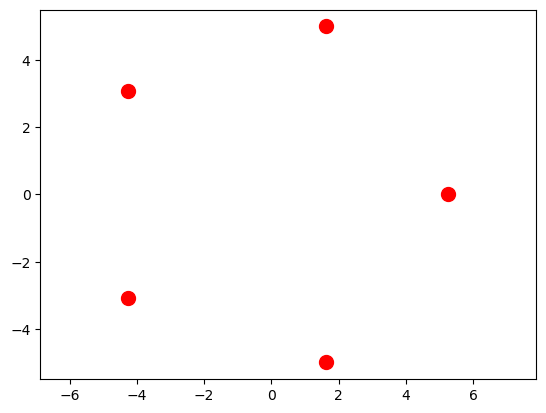

In [23]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

In [24]:
alpha = 2*np.pi/n
beta = alpha/2

In [25]:
angle = np.linspace(-beta/2, beta/2, N)

In [26]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi),np.sin(angle + np.pi)])

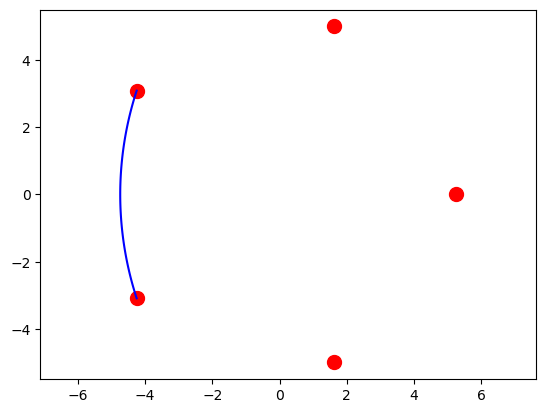

In [27]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

In [28]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),
 np.sin(angle + np.pi + alpha)])

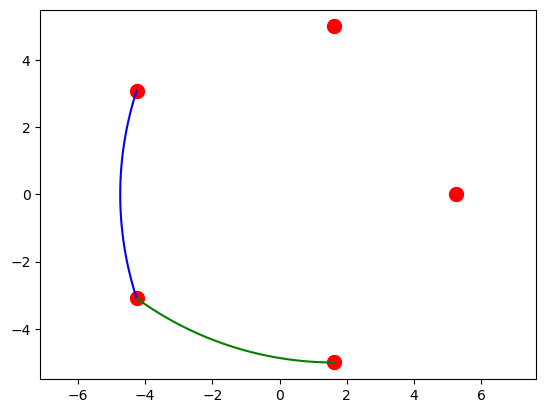

In [29]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

In [30]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]

In [31]:
sides = np.concatenate(list_sides)

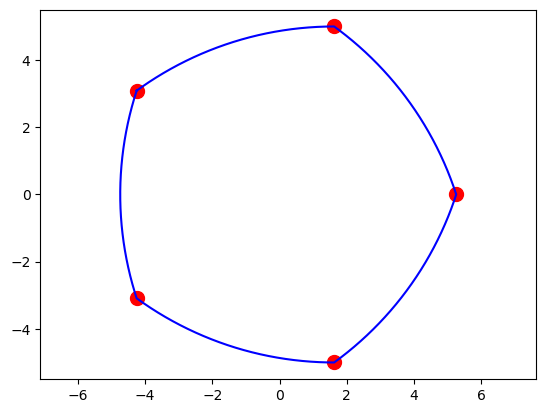

In [32]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

## Задание 4.3. Результирующая пользовательская функция

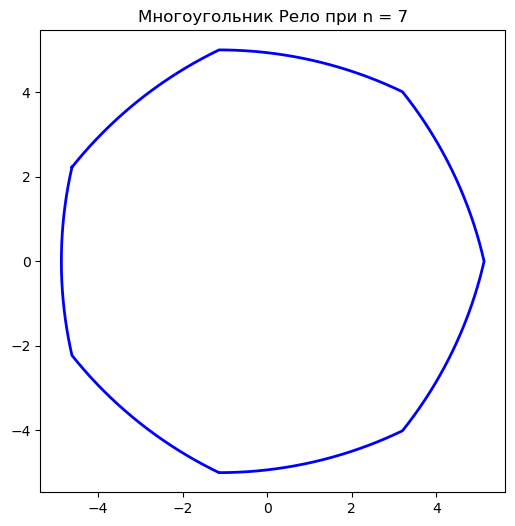

In [34]:
import numpy as np
from typing import Optional, Union, List

def regular_polygon_Relo(
    n: int ,
    center: np.ndarray = np.array([0, 0]),
    r: float = 10.,
    N: int = 100
) -> np.ndarray:
    """
    Генерирует координаты точек, описывающих границу правильного многоугольника Рело.

    Аргументы:
        n (int): Количество вершин (нечетное >2). По умолчанию 3.
        center (np.ndarray): Координаты центра. По умолчанию [0, 0].
        r (float): Ширина многоугольника. По умолчанию 1.
        N (int): Количество точек на сторону. По умолчанию 100.

    Возвращает:
        np.ndarray: Матрица с координатами точек границы (shape: (n*N, 2)).

    Пример:
        >>> points = regular_polygon_Relo(n=3, r=2)
    """
    assert isinstance(n, int) and n > 2 and n % 2 != 0, "n должно быть нечетным целым >2"
    assert r > 0, "r должно быть положительным"
    assert N >= 1, "N должно быть натуральным"
    
   

    l = 2 * r * np.sin(np.pi / (2 * n)) 
    R = l / (2 * np.sin(np.pi / n))

    # Координаты вершин исходного n-угольника
    t=np.arange(0,2*np.pi, 2*np.pi/n)
    vertices = center + R * np.transpose([np.cos(t), np.sin(t)])


    alpha = 2 * np.pi / n                
    beta = alpha / 2                     
    angle = np.linspace(-beta/2, beta/2, N)

    
    list_sides = [vertices[i] +
    r*np.transpose([np.cos(angle + np.pi + i*alpha),
    np.sin(angle + np.pi + i*alpha)])
    for i in range(n)]

    sides = np.concatenate(list_sides)
    return sides
    
if __name__ == "__main__":
    polygon = regular_polygon_Relo(7, np.array([0, 0]), 10, 100)

    plt.figure(figsize=(6, 6))
    plt.plot(polygon[:, 0], polygon[:, 1], 'b-', lw=2)
    plt.axis('equal')
    plt.title("Многоугольник Рело при n = 7")
    plt.show()

In [35]:
# Доступ к документации
print(regular_polygon_Relo.__doc__)

# Доступ к аннотациям
print(regular_polygon_Relo.__annotations__)


    Генерирует координаты точек, описывающих границу правильного многоугольника Рело.

    Аргументы:
        n (int): Количество вершин (нечетное >2). По умолчанию 3.
        center (np.ndarray): Координаты центра. По умолчанию [0, 0].
        r (float): Ширина многоугольника. По умолчанию 1.
        N (int): Количество точек на сторону. По умолчанию 100.

    Возвращает:
        np.ndarray: Матрица с координатами точек границы (shape: (n*N, 2)).

    Пример:
        >>> points = regular_polygon_Relo(n=3, r=2)
    
{'n': <class 'int'>, 'center': <class 'numpy.ndarray'>, 'r': <class 'float'>, 'N': <class 'int'>, 'return': <class 'numpy.ndarray'>}


## Задание 4.4. Тестирование функции

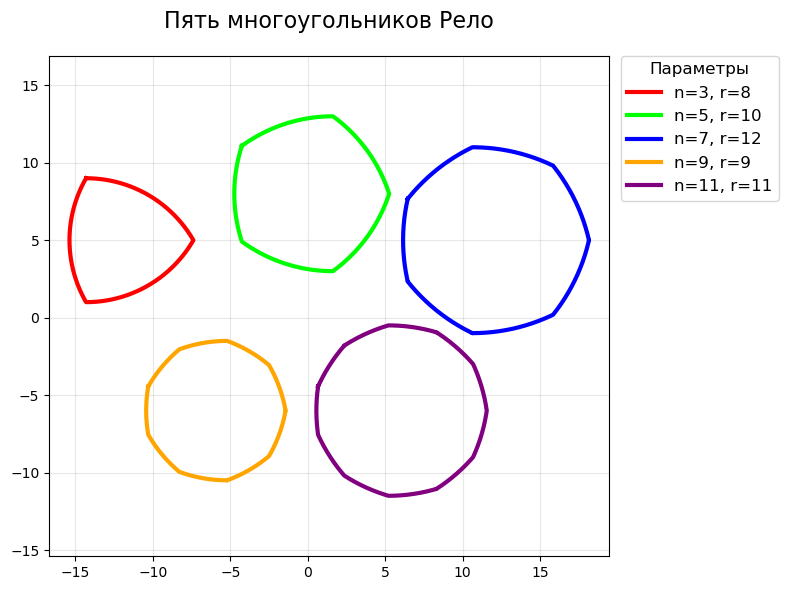

In [39]:
def regular_polygon_Relo(n: int, center: np.ndarray = np.array([0, 0]), r: float = 10., N: int = 100) -> np.ndarray:
    assert isinstance(n, int) and n > 2 and n % 2 != 0, 
    assert r > 0,
    assert N >= 1, 
    
    l = 2 * r * np.sin(np.pi / (2 * n))
    R = l / (2 * np.sin(np.pi / n))
    
    t = np.arange(0, 2*np.pi, 2*np.pi/n)
    vertices = center + R * np.transpose([np.cos(t), np.sin(t)])
    
    alpha = 2 * np.pi / n
    beta = alpha / 2
    angle = np.linspace(-beta/2, beta/2, N)
    
    list_sides = [vertices[i] +
                 r*np.transpose([np.cos(angle + np.pi + i*alpha),
                                np.sin(angle + np.pi + i*alpha)])
                 for i in range(n)]
    
    return np.concatenate(list_sides)

if __name__ == "__main__":
    plt.figure(figsize=(8, 6))
    
    params = [
        (3, np.array([-12, 5]), 8),  
        (5, np.array([0, 8]), 10), 
        (7, np.array([12, 5]), 12), 
        (9, np.array([-6, -6]), 9),   
        (11, np.array([6, -6]), 11)  
    ]
    
    colors = ['red', 'lime', 'blue', 'orange', 'purple']
    
    for i, (n, center, r) in enumerate(params):
        polygon = regular_polygon_Relo(n, center, r, 100)
        plt.plot(polygon[:, 0], polygon[:, 1], 
                color=colors[i], 
                linewidth=3,
                label=f'n={n}, r={r}')
    
    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    plt.title("Пять многоугольников Рело", fontsize=16, pad=20)
    
    legend = plt.legend(bbox_to_anchor=(1.02, 1),  loc='upper left',borderaxespad=0.,fontsize=12,title="Параметры",title_fontsize=12)

    plt.tight_layout()
    plt.show()

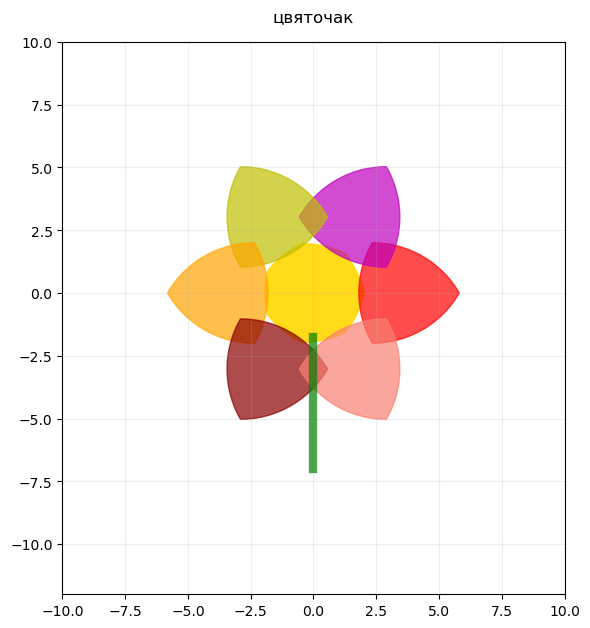

In [41]:
def regular_polygon_Relo(n: int, center: np.ndarray = np.array([0, 0]), r: float = 1.0, N: int = 100) -> np.ndarray:
    assert isinstance(n, int) and n > 2 and n % 2 != 0, 
    assert r > 0, 
    assert N >= 1, 
    
    l = 2 * r * np.sin(np.pi / (2 * n))
    R = l / (2 * np.sin(np.pi / n))
    
    t = np.arange(0, 2*np.pi, 2*np.pi/n)
    vertices = center + R * np.transpose([np.cos(t), np.sin(t)])
    
    alpha = 2 * np.pi / n
    beta = alpha / 2
    angle = np.linspace(-beta/2, beta/2, N)
    
    list_sides = [vertices[i] +
                 r*np.transpose([np.cos(angle + np.pi + i*alpha),
                                np.sin(angle + np.pi + i*alpha)])
                 for i in range(n)]
    
    return np.concatenate(list_sides)

if __name__ == "__main__":
    # Создаем фигуру
    plt.figure(figsize=(6, 8))
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.grid(True, alpha=0.2)
    
    center_radius = 4
    petal_radius = 4
    num_petals = 6
    petal_distance = 3.5
    
    center_flower = regular_polygon_Relo(7, np.array([0, 0]), center_radius, 150)
    plt.fill(center_flower[:, 0], center_flower[:, 1], '#FFD700', alpha=0.9)
    
    petal_colors = ['r', 'm', 'y', 'orange', 'darkred', 'salmon']
    
    for i in range(num_petals):
        angle = i * 2*np.pi/num_petals
        x = petal_distance * np.cos(angle)
        y = petal_distance * np.sin(angle)
        
        petal = regular_polygon_Relo(3, np.array([x, y]), petal_radius, 100)

        theta = angle
        x_rot = (petal[:,0] - x) * np.cos(theta) - (petal[:,1] - y) * np.sin(theta) + x
        y_rot = (petal[:,0] - x) * np.sin(theta) + (petal[:,1] - y) * np.cos(theta) + y
        petal = np.column_stack([x_rot, y_rot])
        
        color = petal_colors[i % len(petal_colors)]
        plt.fill(petal[:, 0], petal[:, 1], color=color, alpha=0.7)
    
    plt.plot([0, 0], [-petal_distance*2, -petal_distance/2], 'g-', linewidth=6, alpha=0.7)
    
    plt.title("цвяточак", fontsize=12, pad=15)
    plt.xlim(-10, 10)
    plt.ylim(-12, 10)
    plt.tight_layout()
    plt.show()